# Training Classifier Vidmizer

<li>https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html</li>

# Classifier 2D Binaire vidmizer sur un Resnet
<p> Le code utilisé est celui de notre précédent classifier qui a été modifié </p>

## Loader

### Gestion de l'accès au drive / import des bibliothèques / Gestion de l'accès au GPU

In [1]:
########## Accès au drive ########
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
########## Positionnement dans le repertoire ########
# %cd /content/drive/MyDrive/TSP/HTI/PFE
#%cd /content/drive/MyDrive/PFE
# !ls /content/drive/MyDrive/TSP/HTI/PFE
!ls /content

drive  sample_data


In [3]:
# !unzip /content/drive/MyDrive/TSP/HTI/PFE/train_vidmizer.zip
# !unzip /content/drive/MyDrive/TSP/HTI/PFE/test_vidmizer.zip
# !unzip /content/train_vidmizer.zip
# !unzip /content/test_vidmizer.zip

!unzip /content/drive/MyDrive/TSP/HTI/PFE/test_tiktok.zip -d /content/
!unzip /content/drive/MyDrive/TSP/HTI/PFE/train_tiktok.zip -d /content/

Archive:  /content/drive/MyDrive/TSP/HTI/PFE/test_tiktok.zip
   creating: /content/test_tiktok/
  inflating: /content/test_tiktok/tiktok_179_ycbcr_6.npy  
  inflating: /content/test_tiktok/vidmizer_173_ycbcr_5.npy  
  inflating: /content/test_tiktok/tiktok_198_ycbcr_7.npy  
  inflating: /content/test_tiktok/tiktok_163_ycbcr_15.npy  
  inflating: /content/test_tiktok/tiktok_163_ycbcr_29.npy  
  inflating: /content/test_tiktok/tiktok_169_ycbcr_1.npy  
  inflating: /content/test_tiktok/vidmizer_163_ycbcr_2.npy  
  inflating: /content/test_tiktok/tiktok_194_ycbcr_1.npy  
  inflating: /content/test_tiktok/vidmizer_174_ycbcr_16.npy  
  inflating: /content/test_tiktok/vidmizer_164_ycbcr_24.npy  
  inflating: /content/test_tiktok/youtube_169_ycbcr_20.npy  
  inflating: /content/test_tiktok/vidmizer_182_ycbcr_2.npy  
  inflating: /content/test_tiktok/tiktok_194_ycbcr_0.npy  
  inflating: /content/test_tiktok/youtube_163_ycbcr_8.npy  
  inflating: /content/test_tiktok/vidmizer_163_ycbcr_3.npy  


In [4]:
###### Librairies #######
import os
import pandas as pd
import glob
from torchvision.io import read_image
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
#########################

In [5]:
!ls /content/

drive  Loader_2D_C_ycbcr.py  sample_data  test_tiktok  train_tiktok


In [6]:
########## Gestion du GPU ###########
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # see if gpu is available
print('Using gpu: %s ' % torch.cuda.is_available())

Using gpu: True 


### Fonctions de Customisation de Dataset et de Loader

In [7]:
########### Importation de la Classe Customisée ######
import sys
# !cd /content/drive/MyDrive/TSP/HTI/PFE
sys.path.append('Loader_2D_C_ycbcr.py')
print(sys.path)
from Loader_2D_C_ycbcr import CustomImageDataset

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', 'Loader_2D_C_ycbcr.py']


In [8]:
################# Modification selon la classe  du RESNET #########@

########## Path ##########
dataset_2D = './train_tiktok'
dataset_test_2D = './test_tiktok'
annotation_test = dataset_test_2D + '/label_test_tiktok.txt'
annotation = dataset_2D + '/label_train_tiktok.txt'

Calcul de la mean et de la vairiance du dataset

In [9]:
# Initialiser des variables pour accumuler les sommes et les sommes des carrés
sum_of_pixels = 0
sum_of_squares = 0
num_of_pixels = 0

# Parcourir le répertoire et charger chaque fichier .npy
for filename in os.listdir(dataset_2D):
    if filename.endswith('.npy'):
        filepath = os.path.join(dataset_2D, filename)
        data = np.load(filepath)  # Charger le fichier .npy

        # Accumuler les valeurs
        sum_of_pixels += np.sum(data)
        sum_of_squares += np.sum(data ** 2)
        num_of_pixels += data.size
        print(filepath)

# Calcul de la moyenne et de l'écart-type
mean = sum_of_pixels / num_of_pixels
std = np.sqrt((sum_of_squares / num_of_pixels) - (mean ** 2))
print()
print(f'Mean: {mean:.3f}, Std: {std:.3f}')
# mean = -0.136
# std = 14.618

./train_tiktok/tiktok_109_ycbcr_1.npy
./train_tiktok/tiktok_123_ycbcr_3.npy
./train_tiktok/vidmizer_32_ycbcr_2.npy
./train_tiktok/tiktok_148_ycbcr_2.npy
./train_tiktok/youtube_84_ycbcr_0.npy
./train_tiktok/tiktok_3_ycbcr_8.npy
./train_tiktok/tiktok_80_ycbcr_1.npy
./train_tiktok/youtube_0_ycbcr_3.npy
./train_tiktok/tiktok_79_ycbcr_5.npy
./train_tiktok/youtube_107_ycbcr_6.npy
./train_tiktok/tiktok_44_ycbcr_8.npy
./train_tiktok/tiktok_132_ycbcr_19.npy
./train_tiktok/vidmizer_130_ycbcr_10.npy
./train_tiktok/tiktok_103_ycbcr_1.npy
./train_tiktok/youtube_40_ycbcr_10.npy
./train_tiktok/tiktok_90_ycbcr_9.npy
./train_tiktok/tiktok_75_ycbcr_3.npy
./train_tiktok/tiktok_43_ycbcr_7.npy
./train_tiktok/youtube_122_ycbcr_0.npy
./train_tiktok/tiktok_80_ycbcr_0.npy
./train_tiktok/tiktok_28_ycbcr_1.npy
./train_tiktok/tiktok_32_ycbcr_12.npy
./train_tiktok/tiktok_85_ycbcr_13.npy
./train_tiktok/tiktok_138_ycbcr_1.npy
./train_tiktok/youtube_79_ycbcr_9.npy
./train_tiktok/tiktok_132_ycbcr_13.npy
./train_tiktok

In [10]:
##### Image preprocessing #####
from torchvision import transforms
preprocess = transforms.Compose([
        # transforms.ToTensor(),
        transforms.Resize(576, antialias=True),  # image batch, resize smaller edge to 576
        transforms.CenterCrop(576),  # image batch, center crop to square 576x576
        # transforms.Normalize(mean=[mean, mean, mean], std=[std, std, std])
])

### Instance des Datasets et Loaders

In [11]:
############## Paramètre ################
batch_size = 64

############## Train Part ###############
train_set = CustomImageDataset(
    annotations_file = annotation,
    npy_dir = dataset_2D,
    transform=preprocess
)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

############## Test Part ################

test_set = CustomImageDataset(
    annotations_file = annotation_test,
    npy_dir = dataset_test_2D,
    transform=preprocess
)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=False, num_workers=2)



In [12]:
# sample_1 = train_set[0][0]
# print(sample_1.shape)
# print()
# print(train_set[1])
# print("max value : ", torch.max(sample_1), "min value : ", torch.min(sample_1))

### Try loader

torch.Size([3, 576, 576])


<function matplotlib.pyplot.show(close=None, block=None)>

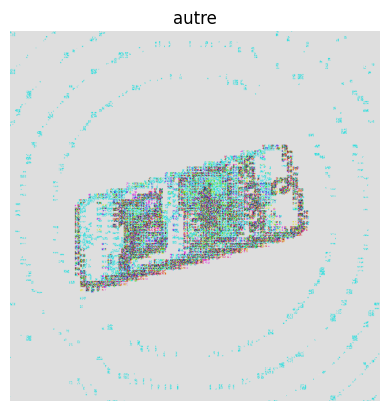

In [13]:
###### Fonction d'affichage ######
def denormalize(img_tensor):
        inverse_normalize = transforms.Normalize(
            mean=[-mean/std, -mean/std, -mean/std],
            std=[1/std, 1/std, 1/std]
        )
        return (inverse_normalize(img_tensor) * 255.).type(torch.uint8).permute(1, 2, 0).numpy()

labels_map = {
    0: "vidmizer" ,
    1: "autre",
}

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

img = images[0]
label = labels[0]
print(img.size())

plt.title(labels_map[int(label.numpy())])
plt.axis("off")
plt.imshow(denormalize(img))
plt.show


## Classifier

### Define the Convolutional Neural Network ( Utilisation de ResNet )

In [14]:
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm



In [15]:
net = torchvision.models.resnet18(weights=None)
num_ftrs = net.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
net.fc = nn.Linear(num_ftrs, 2)

In [16]:
print(net)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Define a Loss function and optimizer

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 20], gamma=.1)

In [18]:
num_class = 2

def quality_measurement(confusion_matrix):
    line_sum=torch.sum(confusion_matrix,dim=1)
    column_sum = torch.sum(confusion_matrix, dim=0)
    total_sum=torch.sum(confusion_matrix)
    Accuracy=torch.sum(torch.diag(confusion_matrix))/total_sum
    Precision=torch.diag(confusion_matrix)/line_sum
    Recall=torch.diag(confusion_matrix)/column_sum
    F1_score = 2 * (Precision * Recall)/(Precision+Recall)
    Pfa=(line_sum - torch.diag(confusion_matrix))/total_sum
    Pmd=(column_sum - torch.diag(confusion_matrix))/total_sum
    print("Accuracy : {}".format(Accuracy.item()))
    print("Precision 0 : {} - Precision 1 : {}".format(Precision[0],Precision[1]))
    print("Recall 0 : {} - Recall 1 : {}".format(Recall[0], Recall[1]))
    print("F1 score 0 : {} - F1 score 1 : {}".format(F1_score[0], F1_score[1]))
    print("Pfa 0 : {} - Pfa 1 : {}".format(Pfa[0], Pfa[1]))
    print("Pmd 0 : {} - Pmd 1 : {}".format(Pmd[0], Pmd[1]))
    return torch.nanmean(Accuracy),torch.nanmean(Precision),torch.nanmean(Recall),torch.nanmean(Recall),torch.nanmean(Pfa),torch.nanmean(Pmd)

def test_accuracy():
  net.eval()
  correct = 0
  total = 0
  confusion_matrix=torch.zeros((num_class,num_class),device=device)
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in test_loader:
          images, labels = data

          images = images.to(device)
          labels = labels.to(device)

          # calculate outputs by running images through the network
          outputs = net(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          for i in range(len(labels)):
                label=int(labels[i])
                confusion_matrix[predicted[i],label]=confusion_matrix[predicted[i],label]+1
  net.train()
  print(quality_measurement(confusion_matrix))
  return  correct / total, confusion_matrix

In [19]:
list_lr = [0.1]#, 0.01, 0.001, 0.0001]
loss_saveds=[]
accuracy_saveds=[]
test_accuracy_saveds=[]



for lr_v in list_lr :
  net = torchvision.models.resnet18(weights=None)
  num_ftrs = net.fc.in_features
  net.fc = nn.Linear(num_ftrs, 2)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=lr_v)
  scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 20], gamma=.1)
  net = net.to(device)
  loss_saved=[]
  accuracy_saved=[]
  test_accuracy_saved=[]


  for epoch in tqdm(range(23)):  # loop over the dataset multiple times

      running_loss = 0.0
      correct = 0
      total = 0
      for i, data in enumerate(train_loader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          inputs = inputs.to(device)
          labels = labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)

          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()


      loss_saved.append(running_loss/((i+1)*batch_size))
      accuracy_saved.append(correct / total)
      running_loss = 0.0
      scheduler.step()

      test_accuracy_val, matrice_confusion = test_accuracy()
      test_accuracy_saved.append(test_accuracy_val)

  print('Finished Training')
  print('Loss : ' , loss_saved)
  print('Accuracy : ' , accuracy_saved)
  print('Accuracy : ' , test_accuracy_saved)
  print( 'Matrice de confusion : ' , matrice_confusion)
  loss_saveds.append(loss_saved)
  accuracy_saveds.append(accuracy_saved)
  test_accuracy_saveds.append(test_accuracy_saved)
  PATH = f'/content/drive/MyDrive/TSP/HTI/PFE/pfe_papier_{lr_v}_tiktok.pth'
  torch.save(net.state_dict(), PATH)



  0%|          | 0/23 [00:00<?, ?it/s]

Accuracy : 0.8954423666000366
Precision 0 : 0.9624999761581421 - Precision 1 : 0.8450704216957092
Recall 0 : 0.8235294222831726 - Recall 1 : 0.9677419066429138
F1 score 0 : 0.8876081109046936 - F1 score 1 : 0.9022555947303772
Pfa 0 : 0.0160857904702425 - Pfa 1 : 0.08847185224294662
Pmd 0 : 0.08847185224294662 - Pmd 1 : 0.0160857904702425


  4%|▍         | 1/23 [00:55<20:22, 55.57s/it]

(tensor(0.8954, device='cuda:0'), tensor(0.9038, device='cuda:0'), tensor(0.8956, device='cuda:0'), tensor(0.8956, device='cuda:0'), tensor(0.0523, device='cuda:0'), tensor(0.0523, device='cuda:0'))


  9%|▊         | 2/23 [01:53<19:49, 56.66s/it]

Accuracy : 0.9678283929824829
Precision 0 : 1.0 - Precision 1 : 0.939393937587738
Recall 0 : 0.9358288645744324 - Recall 1 : 1.0
F1 score 0 : 0.9668508172035217 - F1 score 1 : 0.9687499403953552
Pfa 0 : 0.0 - Pfa 1 : 0.032171580940485
Pmd 0 : 0.032171580940485 - Pmd 1 : 0.0
(tensor(0.9678, device='cuda:0'), tensor(0.9697, device='cuda:0'), tensor(0.9679, device='cuda:0'), tensor(0.9679, device='cuda:0'), tensor(0.0161, device='cuda:0'), tensor(0.0161, device='cuda:0'))


 13%|█▎        | 3/23 [02:52<19:15, 57.79s/it]

Accuracy : 0.9731903672218323
Precision 0 : 0.994413435459137 - Precision 1 : 0.9536082744598389
Recall 0 : 0.9518716335296631 - Recall 1 : 0.9946236610412598
F1 score 0 : 0.9726776480674744 - F1 score 1 : 0.9736842513084412
Pfa 0 : 0.002680965233594179 - Pfa 1 : 0.024128686636686325
Pmd 0 : 0.024128686636686325 - Pmd 1 : 0.002680965233594179
(tensor(0.9732, device='cuda:0'), tensor(0.9740, device='cuda:0'), tensor(0.9732, device='cuda:0'), tensor(0.9732, device='cuda:0'), tensor(0.0134, device='cuda:0'), tensor(0.0134, device='cuda:0'))


 17%|█▋        | 4/23 [03:50<18:25, 58.19s/it]

Accuracy : 0.9758713245391846
Precision 0 : 1.0 - Precision 1 : 0.9538461565971375
Recall 0 : 0.9518716335296631 - Recall 1 : 1.0
F1 score 0 : 0.9753424525260925 - F1 score 1 : 0.9763779044151306
Pfa 0 : 0.0 - Pfa 1 : 0.024128686636686325
Pmd 0 : 0.024128686636686325 - Pmd 1 : 0.0
(tensor(0.9759, device='cuda:0'), tensor(0.9769, device='cuda:0'), tensor(0.9759, device='cuda:0'), tensor(0.9759, device='cuda:0'), tensor(0.0121, device='cuda:0'), tensor(0.0121, device='cuda:0'))


 22%|██▏       | 5/23 [04:50<17:36, 58.72s/it]

Accuracy : 0.97050940990448
Precision 0 : 1.0 - Precision 1 : 0.9441624283790588
Recall 0 : 0.9411764740943909 - Recall 1 : 1.0
F1 score 0 : 0.9696969985961914 - F1 score 1 : 0.9712793827056885
Pfa 0 : 0.0 - Pfa 1 : 0.02949061617255211
Pmd 0 : 0.02949061617255211 - Pmd 1 : 0.0
(tensor(0.9705, device='cuda:0'), tensor(0.9721, device='cuda:0'), tensor(0.9706, device='cuda:0'), tensor(0.9706, device='cuda:0'), tensor(0.0147, device='cuda:0'), tensor(0.0147, device='cuda:0'))


 26%|██▌       | 6/23 [05:50<16:47, 59.24s/it]

Accuracy : 0.9785522818565369
Precision 0 : 1.0 - Precision 1 : 0.9587628841400146
Recall 0 : 0.9572192430496216 - Recall 1 : 1.0
F1 score 0 : 0.9781420826911926 - F1 score 1 : 0.9789473414421082
Pfa 0 : 0.0 - Pfa 1 : 0.021447721868753433
Pmd 0 : 0.021447721868753433 - Pmd 1 : 0.0
(tensor(0.9786, device='cuda:0'), tensor(0.9794, device='cuda:0'), tensor(0.9786, device='cuda:0'), tensor(0.9786, device='cuda:0'), tensor(0.0107, device='cuda:0'), tensor(0.0107, device='cuda:0'))


 30%|███       | 7/23 [06:52<16:01, 60.06s/it]

Accuracy : 0.9812332391738892
Precision 0 : 0.9945054650306702 - Precision 1 : 0.9685863852500916
Recall 0 : 0.9679144620895386 - Recall 1 : 0.9946236610412598
F1 score 0 : 0.9810298085212708 - F1 score 1 : 0.9814323782920837
Pfa 0 : 0.002680965233594179 - Pfa 1 : 0.0160857904702425
Pmd 0 : 0.0160857904702425 - Pmd 1 : 0.002680965233594179
(tensor(0.9812, device='cuda:0'), tensor(0.9815, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.0094, device='cuda:0'), tensor(0.0094, device='cuda:0'))


 35%|███▍      | 8/23 [07:53<15:06, 60.44s/it]

Accuracy : 0.9651474356651306
Precision 0 : 0.953125 - Precision 1 : 0.9779005646705627
Recall 0 : 0.9786096215248108 - Recall 1 : 0.9516128897666931
F1 score 0 : 0.9656992554664612 - F1 score 1 : 0.9645776152610779
Pfa 0 : 0.024128686636686325 - Pfa 1 : 0.010723860934376717
Pmd 0 : 0.010723860934376717 - Pmd 1 : 0.024128686636686325
(tensor(0.9651, device='cuda:0'), tensor(0.9655, device='cuda:0'), tensor(0.9651, device='cuda:0'), tensor(0.9651, device='cuda:0'), tensor(0.0174, device='cuda:0'), tensor(0.0174, device='cuda:0'))


 39%|███▉      | 9/23 [08:53<14:03, 60.27s/it]

Accuracy : 0.9785522818565369
Precision 0 : 0.9944751262664795 - Precision 1 : 0.9635416865348816
Recall 0 : 0.9625668525695801 - Recall 1 : 0.9946236610412598
F1 score 0 : 0.97826087474823 - F1 score 1 : 0.9788359999656677
Pfa 0 : 0.002680965233594179 - Pfa 1 : 0.018766755238175392
Pmd 0 : 0.018766755238175392 - Pmd 1 : 0.002680965233594179
(tensor(0.9786, device='cuda:0'), tensor(0.9790, device='cuda:0'), tensor(0.9786, device='cuda:0'), tensor(0.9786, device='cuda:0'), tensor(0.0107, device='cuda:0'), tensor(0.0107, device='cuda:0'))


 43%|████▎     | 10/23 [09:54<13:06, 60.47s/it]

Accuracy : 0.9785522818565369
Precision 0 : 0.9944751262664795 - Precision 1 : 0.9635416865348816
Recall 0 : 0.9625668525695801 - Recall 1 : 0.9946236610412598
F1 score 0 : 0.97826087474823 - F1 score 1 : 0.9788359999656677
Pfa 0 : 0.002680965233594179 - Pfa 1 : 0.018766755238175392
Pmd 0 : 0.018766755238175392 - Pmd 1 : 0.002680965233594179
(tensor(0.9786, device='cuda:0'), tensor(0.9790, device='cuda:0'), tensor(0.9786, device='cuda:0'), tensor(0.9786, device='cuda:0'), tensor(0.0107, device='cuda:0'), tensor(0.0107, device='cuda:0'))


 48%|████▊     | 11/23 [10:55<12:07, 60.61s/it]

Accuracy : 0.9785522818565369
Precision 0 : 0.9944751262664795 - Precision 1 : 0.9635416865348816
Recall 0 : 0.9625668525695801 - Recall 1 : 0.9946236610412598
F1 score 0 : 0.97826087474823 - F1 score 1 : 0.9788359999656677
Pfa 0 : 0.002680965233594179 - Pfa 1 : 0.018766755238175392
Pmd 0 : 0.018766755238175392 - Pmd 1 : 0.002680965233594179
(tensor(0.9786, device='cuda:0'), tensor(0.9790, device='cuda:0'), tensor(0.9786, device='cuda:0'), tensor(0.9786, device='cuda:0'), tensor(0.0107, device='cuda:0'), tensor(0.0107, device='cuda:0'))


 52%|█████▏    | 12/23 [11:58<11:14, 61.28s/it]

Accuracy : 0.9812332391738892
Precision 0 : 1.0 - Precision 1 : 0.9637305736541748
Recall 0 : 0.9625668525695801 - Recall 1 : 1.0
F1 score 0 : 0.9809264540672302 - F1 score 1 : 0.9815303683280945
Pfa 0 : 0.0 - Pfa 1 : 0.018766755238175392
Pmd 0 : 0.018766755238175392 - Pmd 1 : 0.0
(tensor(0.9812, device='cuda:0'), tensor(0.9819, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.0094, device='cuda:0'), tensor(0.0094, device='cuda:0'))


 57%|█████▋    | 13/23 [13:00<10:15, 61.52s/it]

Accuracy : 0.9812332391738892
Precision 0 : 1.0 - Precision 1 : 0.9637305736541748
Recall 0 : 0.9625668525695801 - Recall 1 : 1.0
F1 score 0 : 0.9809264540672302 - F1 score 1 : 0.9815303683280945
Pfa 0 : 0.0 - Pfa 1 : 0.018766755238175392
Pmd 0 : 0.018766755238175392 - Pmd 1 : 0.0
(tensor(0.9812, device='cuda:0'), tensor(0.9819, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.0094, device='cuda:0'), tensor(0.0094, device='cuda:0'))


 61%|██████    | 14/23 [14:01<09:13, 61.48s/it]

Accuracy : 0.9812332391738892
Precision 0 : 1.0 - Precision 1 : 0.9637305736541748
Recall 0 : 0.9625668525695801 - Recall 1 : 1.0
F1 score 0 : 0.9809264540672302 - F1 score 1 : 0.9815303683280945
Pfa 0 : 0.0 - Pfa 1 : 0.018766755238175392
Pmd 0 : 0.018766755238175392 - Pmd 1 : 0.0
(tensor(0.9812, device='cuda:0'), tensor(0.9819, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.0094, device='cuda:0'), tensor(0.0094, device='cuda:0'))


 65%|██████▌   | 15/23 [15:04<08:13, 61.71s/it]

Accuracy : 0.9785522818565369
Precision 0 : 0.9944751262664795 - Precision 1 : 0.9635416865348816
Recall 0 : 0.9625668525695801 - Recall 1 : 0.9946236610412598
F1 score 0 : 0.97826087474823 - F1 score 1 : 0.9788359999656677
Pfa 0 : 0.002680965233594179 - Pfa 1 : 0.018766755238175392
Pmd 0 : 0.018766755238175392 - Pmd 1 : 0.002680965233594179
(tensor(0.9786, device='cuda:0'), tensor(0.9790, device='cuda:0'), tensor(0.9786, device='cuda:0'), tensor(0.9786, device='cuda:0'), tensor(0.0107, device='cuda:0'), tensor(0.0107, device='cuda:0'))


 70%|██████▉   | 16/23 [16:05<07:11, 61.61s/it]

Accuracy : 0.9812332391738892
Precision 0 : 1.0 - Precision 1 : 0.9637305736541748
Recall 0 : 0.9625668525695801 - Recall 1 : 1.0
F1 score 0 : 0.9809264540672302 - F1 score 1 : 0.9815303683280945
Pfa 0 : 0.0 - Pfa 1 : 0.018766755238175392
Pmd 0 : 0.018766755238175392 - Pmd 1 : 0.0
(tensor(0.9812, device='cuda:0'), tensor(0.9819, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.0094, device='cuda:0'), tensor(0.0094, device='cuda:0'))


 74%|███████▍  | 17/23 [17:08<06:12, 62.05s/it]

Accuracy : 0.9812332391738892
Precision 0 : 1.0 - Precision 1 : 0.9637305736541748
Recall 0 : 0.9625668525695801 - Recall 1 : 1.0
F1 score 0 : 0.9809264540672302 - F1 score 1 : 0.9815303683280945
Pfa 0 : 0.0 - Pfa 1 : 0.018766755238175392
Pmd 0 : 0.018766755238175392 - Pmd 1 : 0.0
(tensor(0.9812, device='cuda:0'), tensor(0.9819, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.0094, device='cuda:0'), tensor(0.0094, device='cuda:0'))


 78%|███████▊  | 18/23 [18:10<05:09, 61.98s/it]

Accuracy : 0.9812332391738892
Precision 0 : 1.0 - Precision 1 : 0.9637305736541748
Recall 0 : 0.9625668525695801 - Recall 1 : 1.0
F1 score 0 : 0.9809264540672302 - F1 score 1 : 0.9815303683280945
Pfa 0 : 0.0 - Pfa 1 : 0.018766755238175392
Pmd 0 : 0.018766755238175392 - Pmd 1 : 0.0
(tensor(0.9812, device='cuda:0'), tensor(0.9819, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.0094, device='cuda:0'), tensor(0.0094, device='cuda:0'))


 83%|████████▎ | 19/23 [19:13<04:09, 62.30s/it]

Accuracy : 0.9812332391738892
Precision 0 : 1.0 - Precision 1 : 0.9637305736541748
Recall 0 : 0.9625668525695801 - Recall 1 : 1.0
F1 score 0 : 0.9809264540672302 - F1 score 1 : 0.9815303683280945
Pfa 0 : 0.0 - Pfa 1 : 0.018766755238175392
Pmd 0 : 0.018766755238175392 - Pmd 1 : 0.0
(tensor(0.9812, device='cuda:0'), tensor(0.9819, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.0094, device='cuda:0'), tensor(0.0094, device='cuda:0'))


 87%|████████▋ | 20/23 [20:16<03:07, 62.51s/it]

Accuracy : 0.9812332391738892
Precision 0 : 1.0 - Precision 1 : 0.9637305736541748
Recall 0 : 0.9625668525695801 - Recall 1 : 1.0
F1 score 0 : 0.9809264540672302 - F1 score 1 : 0.9815303683280945
Pfa 0 : 0.0 - Pfa 1 : 0.018766755238175392
Pmd 0 : 0.018766755238175392 - Pmd 1 : 0.0
(tensor(0.9812, device='cuda:0'), tensor(0.9819, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.0094, device='cuda:0'), tensor(0.0094, device='cuda:0'))


 91%|█████████▏| 21/23 [21:19<02:05, 62.82s/it]

Accuracy : 0.9812332391738892
Precision 0 : 1.0 - Precision 1 : 0.9637305736541748
Recall 0 : 0.9625668525695801 - Recall 1 : 1.0
F1 score 0 : 0.9809264540672302 - F1 score 1 : 0.9815303683280945
Pfa 0 : 0.0 - Pfa 1 : 0.018766755238175392
Pmd 0 : 0.018766755238175392 - Pmd 1 : 0.0
(tensor(0.9812, device='cuda:0'), tensor(0.9819, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.0094, device='cuda:0'), tensor(0.0094, device='cuda:0'))


 96%|█████████▌| 22/23 [22:20<01:02, 62.24s/it]

Accuracy : 0.9812332391738892
Precision 0 : 1.0 - Precision 1 : 0.9637305736541748
Recall 0 : 0.9625668525695801 - Recall 1 : 1.0
F1 score 0 : 0.9809264540672302 - F1 score 1 : 0.9815303683280945
Pfa 0 : 0.0 - Pfa 1 : 0.018766755238175392
Pmd 0 : 0.018766755238175392 - Pmd 1 : 0.0
(tensor(0.9812, device='cuda:0'), tensor(0.9819, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.0094, device='cuda:0'), tensor(0.0094, device='cuda:0'))


100%|██████████| 23/23 [23:21<00:00, 60.93s/it]

Accuracy : 0.9812332391738892
Precision 0 : 1.0 - Precision 1 : 0.9637305736541748
Recall 0 : 0.9625668525695801 - Recall 1 : 1.0
F1 score 0 : 0.9809264540672302 - F1 score 1 : 0.9815303683280945
Pfa 0 : 0.0 - Pfa 1 : 0.018766755238175392
Pmd 0 : 0.018766755238175392 - Pmd 1 : 0.0
(tensor(0.9812, device='cuda:0'), tensor(0.9819, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.9813, device='cuda:0'), tensor(0.0094, device='cuda:0'), tensor(0.0094, device='cuda:0'))
Finished Training
Loss :  [0.01084344600676559, 0.0011524025998369326, 0.0006202075393957785, 0.0005618935188977048, 0.0005022089327212598, 0.0005266555315756704, 0.0004618141740138526, 0.00042522115363681224, 0.0004800940696441103, 0.00041465370886726303, 0.00036622663947127876, 0.00034049089445034044, 0.00035495119764163976, 0.00034636938844414546, 0.00042333625333412783, 0.0003696738385770004, 0.0003508697369397851, 0.0003352534469740931, 0.0003567258143448271, 0.00032876728109840767, 0.00035745757613767635, 0.

### Print de la loss en fonction des epochs

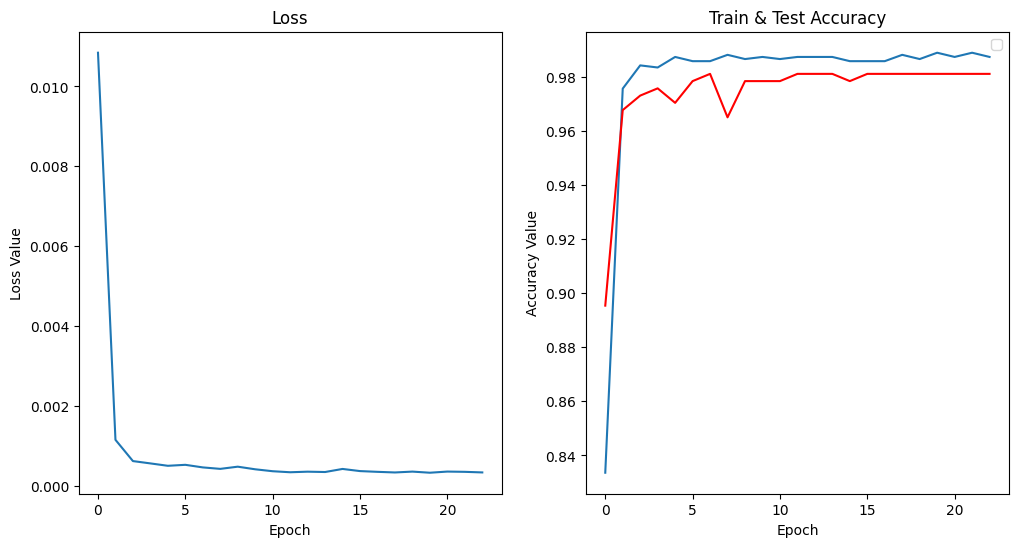

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss_saved)
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.title('Train & Test Accuracy')
plt.plot(accuracy_saved)
plt.plot(test_accuracy_saved, color='r')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.legend()

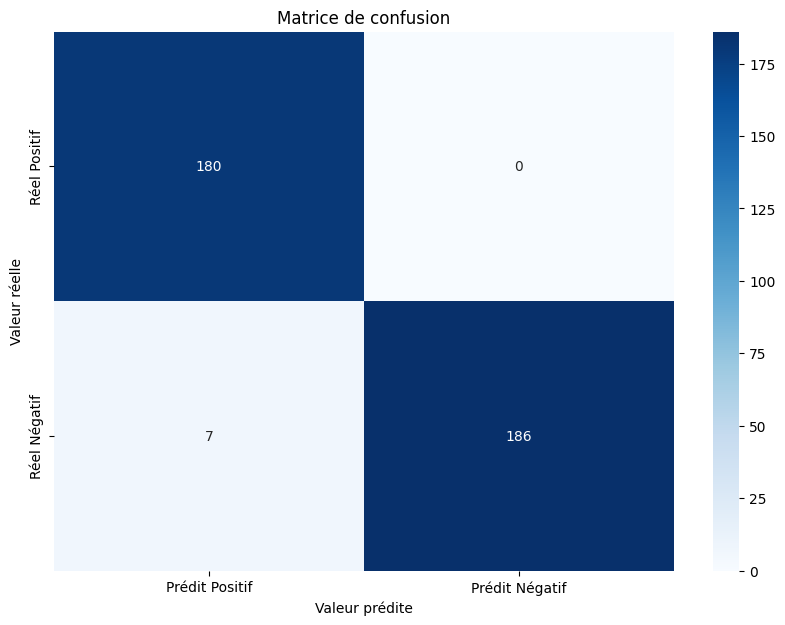

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Données de la matrice de confusion
conf_matrix = [[180, 0], [7, 186]]

# Conversion en DataFrame pour une meilleure visualisation avec Seaborn
df_cm = pd.DataFrame(conf_matrix, index=["Réel Positif", "Réel Négatif"], columns=["Prédit Positif", "Prédit Négatif"])

# Tracé de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.ylabel("Valeur réelle")
plt.xlabel("Valeur prédite")
plt.show()


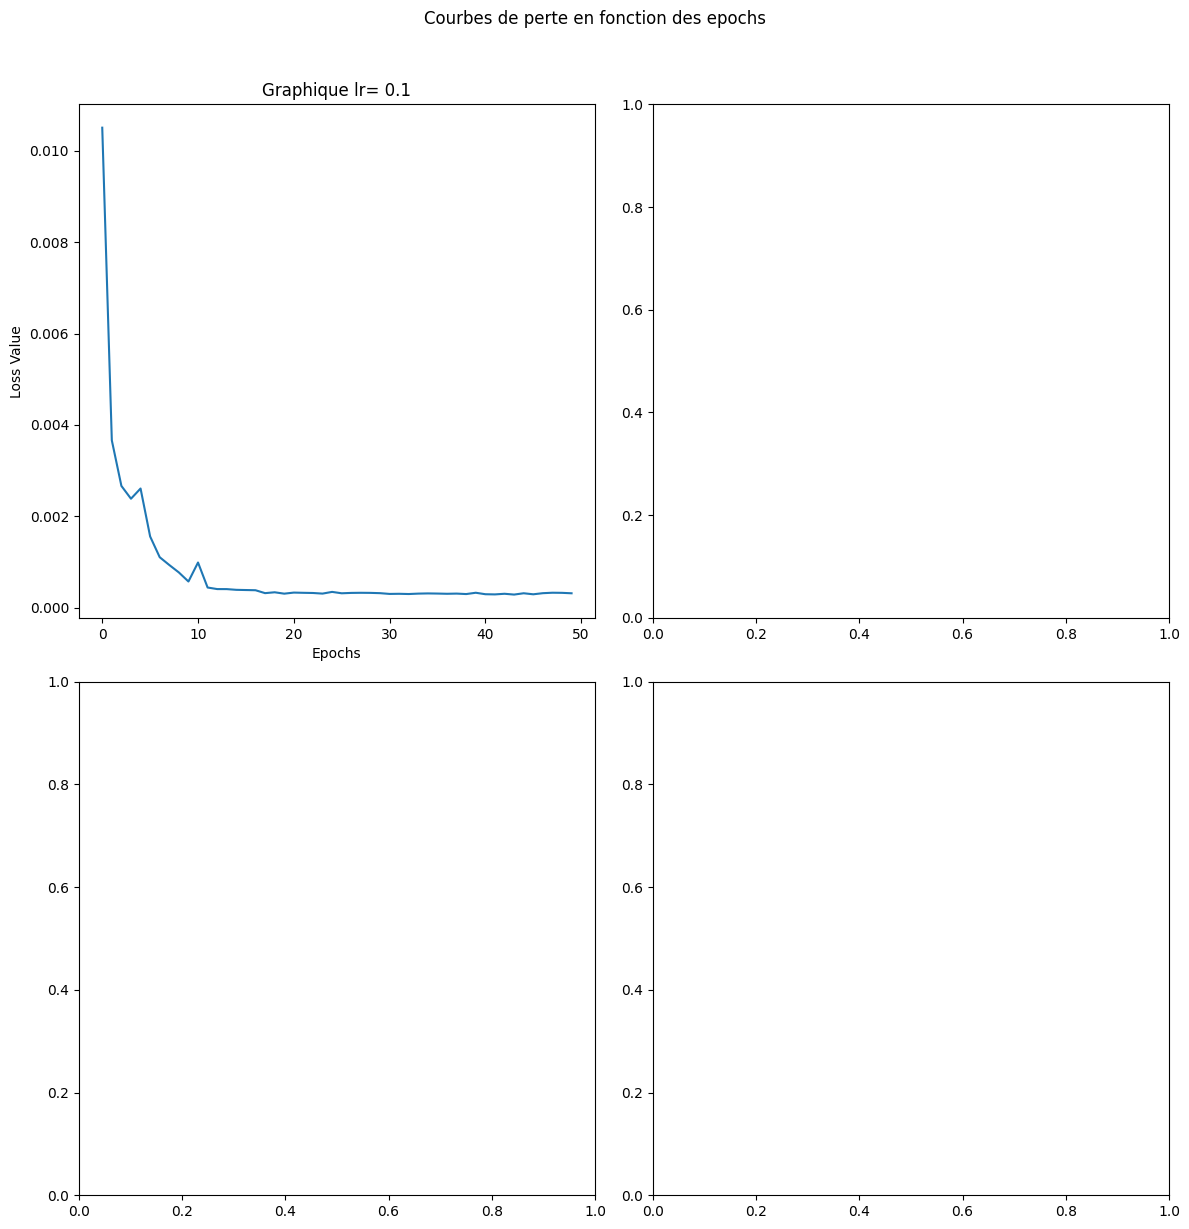

In [ ]:
import matplotlib.pyplot as plt

# Création d'une grille pour afficher les graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 6 * 2))
fig.suptitle('Courbes de perte en fonction des epochs', y=1.02)  # Titre global

# Affichage des courbes dans la grille
for i, loss_saved in enumerate(loss_saveds):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    ax.plot(loss_saved)


    # Ajout de titres aux axes pour chaque sous-plot
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss Value')
    ax.set_title(f'Graphique lr= {list_lr[i]}')

# Ajustement de l'espacement entre les sous-plots
plt.tight_layout()

# Affichage de la grille
plt.show()

### Print de l'accuracy en fonction des epochs

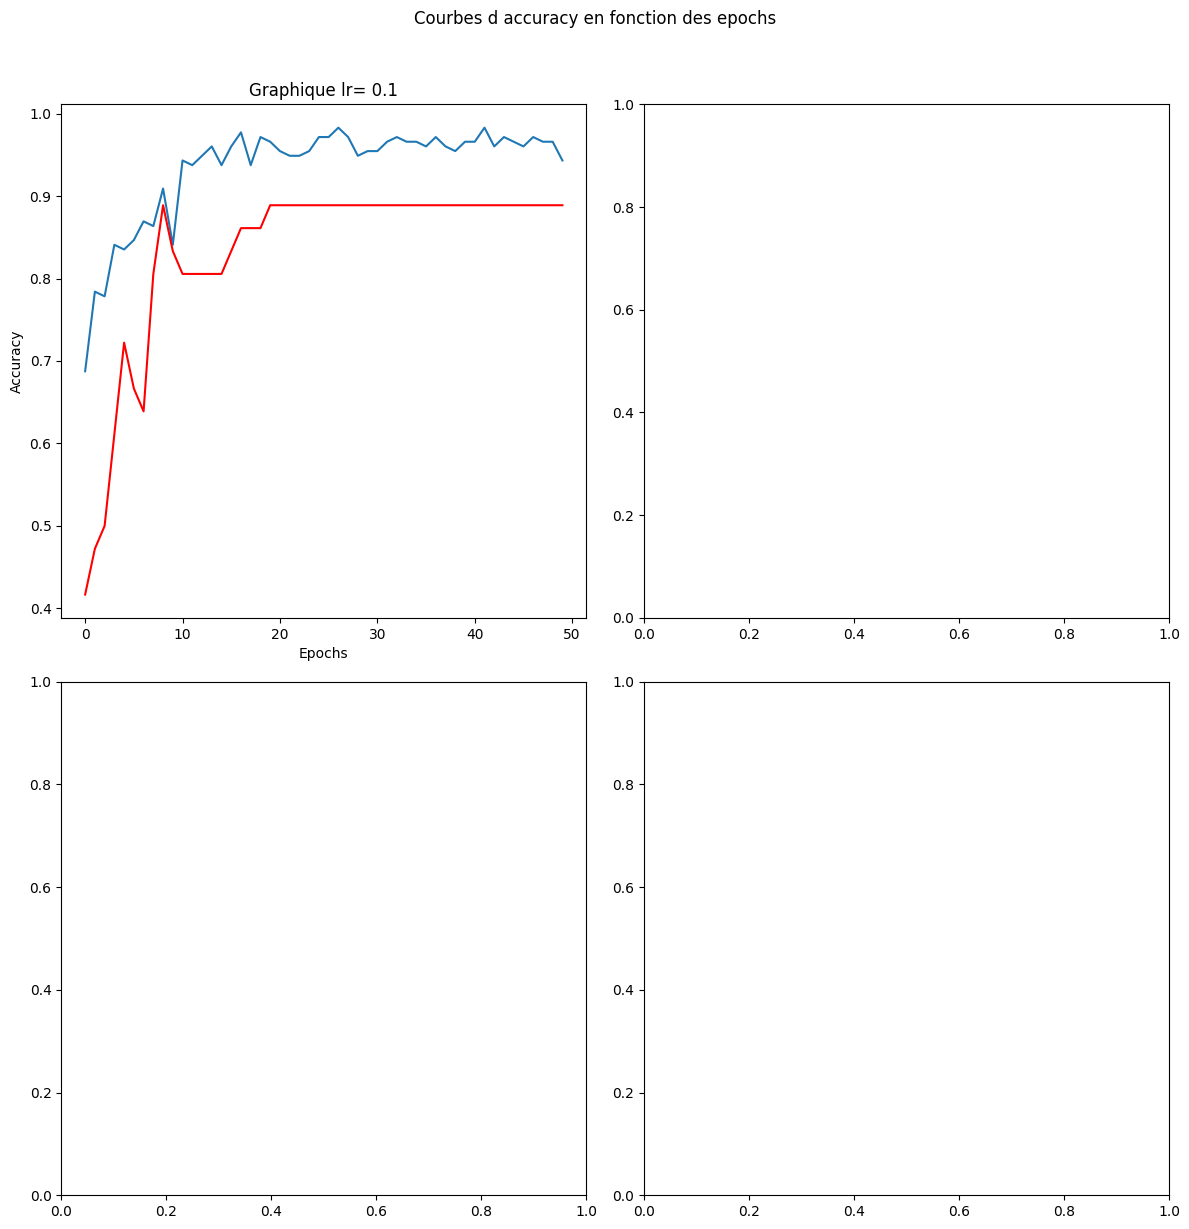

In [ ]:
# Création d'une grille pour afficher les graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 6 * 2))
fig.suptitle('Courbes d accuracy en fonction des epochs', y=1.02)  # Titre global

# Affichage des courbes dans la grille
for i, accuracy_saved in enumerate(accuracy_saveds):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    ax.plot(accuracy_saved,label='train')
    ax.plot(test_accuracy_saveds[i],color='r',label='test')

    # Ajout de titres aux axes pour chaque sous-plot
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Graphique lr= {list_lr[i]}')

# Ajustement de l'espacement entre les sous-plots
plt.tight_layout()

# Affichage de la grille
plt.show()

### Test the network on the test data

#### First test on one frame

In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

images = images.to(device)
labels = labels.to(device)

img = images[0].cpu()  # Copie le tensor sur le CPU
label = labels[0].cpu()  # Copie le tensor sur le CPU

print(img.size())

plt.title(labels_map[int(label.numpy())])
plt.axis("off")
plt.imshow(denormalize(img))
plt.show

torch.Size([3, 576, 576])


NameError: name 'labels_map' is not defined

In [ ]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

In [ ]:
predicted = predicted.cpu()  # Copie le tensor sur le CPU
print(labels_map[int(predicted[0].numpy())])


NameError: name 'labels_map' is not defined

#### Let us look at how the network performs on the whole dataset

#### Result by class

In [ ]:
classes = ('vidmizer','autre')
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)  # Copie les images sur le GPU
        labels = labels.to(device)  # Copie les étiquettes sur le GPU
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: vidmizer is 34.2 %
Accuracy for class: autre is 68.2 %
